In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

         TOWN  TRACT     LON      LAT  MEDV     CRIM    ZN  INDUS  CHAS  \
0      Nahant   2011 -70.955  42.2550  24.0  0.00632  18.0   2.31     0   
1  Swampscott   2021 -70.950  42.2875  21.6  0.02731   0.0   7.07     0   
2  Swampscott   2022 -70.936  42.2830  34.7  0.02729   0.0   7.07     0   
3  Marblehead   2031 -70.928  42.2930  33.4  0.03237   0.0   2.18     0   
4  Marblehead   2032 -70.922  42.2980  36.2  0.06905   0.0   2.18     0   

     NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  
0  0.538  6.575  65.2  4.0900    1  296     15.3  
1  0.469  6.421  78.9  4.9671    2  242     17.8  
2  0.469  7.185  61.1  4.9671    2  242     17.8  
3  0.458  6.998  45.8  6.0622    3  222     18.7  
4  0.458  7.147  54.2  6.0622    3  222     18.7  


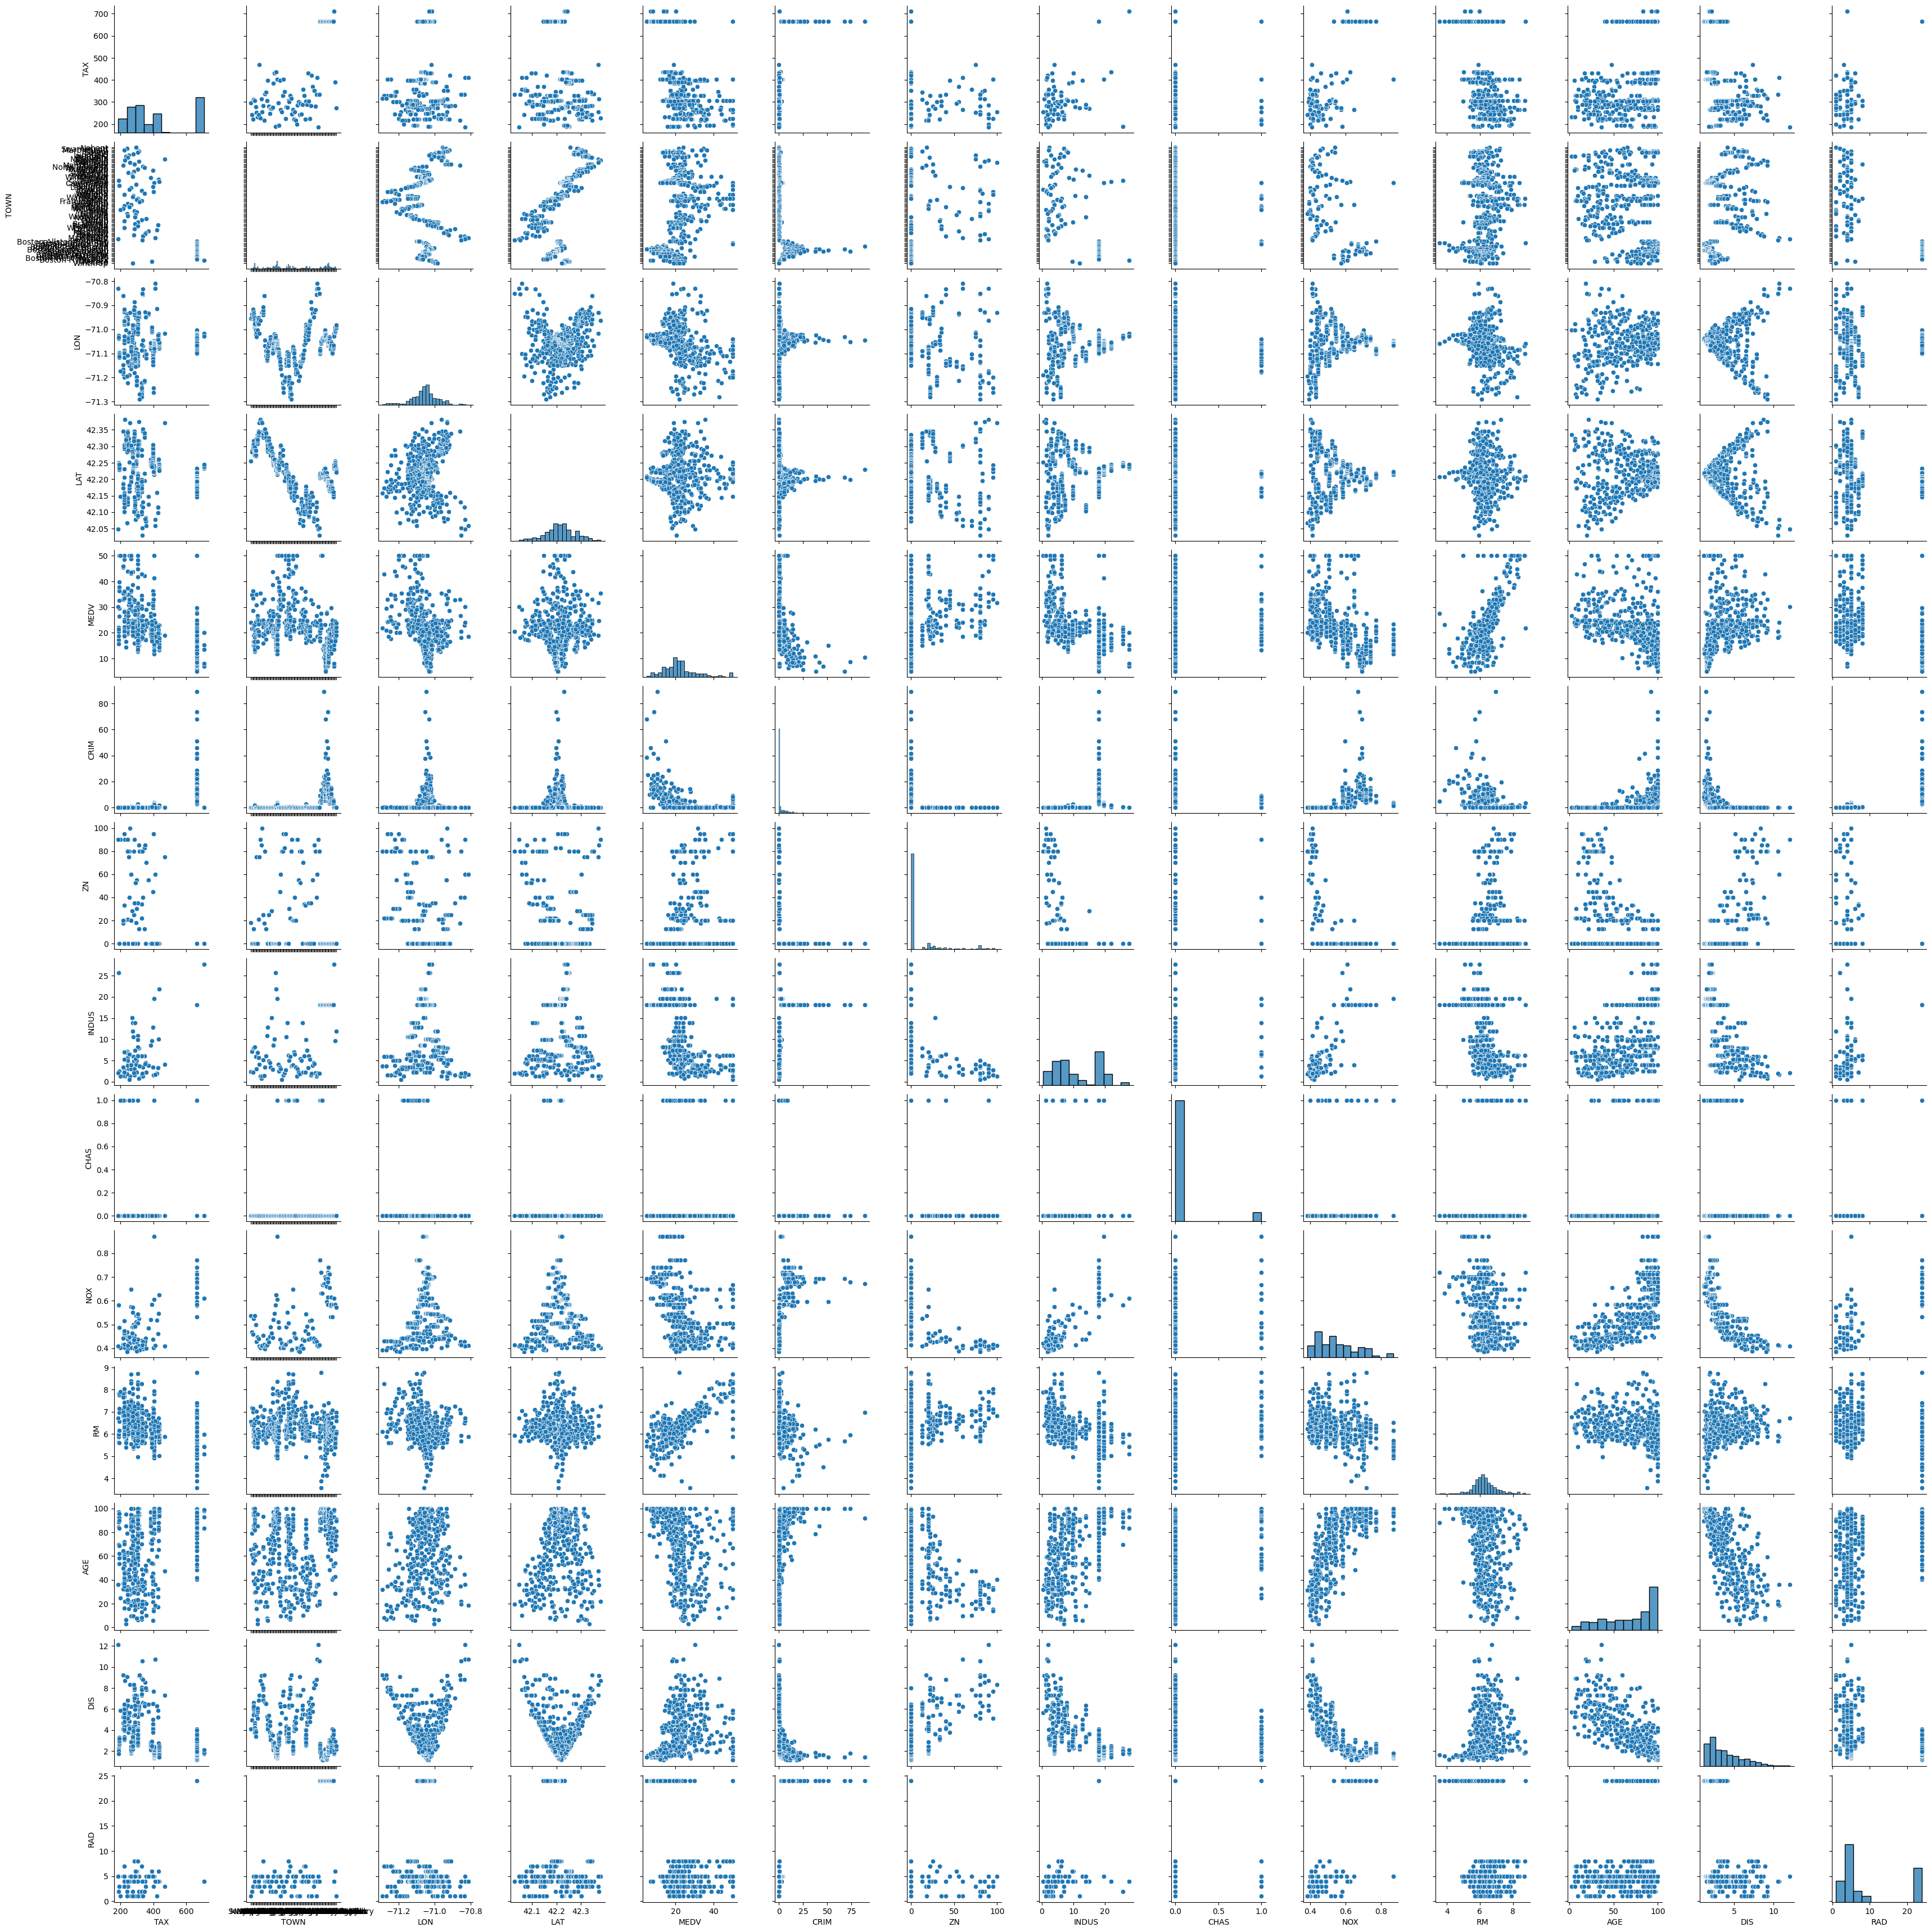

In [12]:
data1 = pd.read_csv('boston_1978.csv')
print(data1.head())
sns.pairplot(data = data1, vars=['TAX', 'TOWN', 'LON', 'LAT', 'MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD'], kind = 'scatter', dropna=True)


In [26]:
# 상관관계가 높은 속성의 이름을 구합니다
corr_result = data1.corr(method='pearson', numeric_only=True)
value_list = []
for column in corr_result.columns:
    if column != 'TAX' :
        value_list.append((column, abs(corr_result['TAX'][column])))
sorted_value_list = sorted(value_list, reverse=True, key=lambda x: x[1])

print(sorted_value_list)

[('RAD', 0.9102281885331867), ('TRACT', 0.7936022358065574), ('INDUS', 0.7207601799515422), ('NOX', 0.6680232004030218), ('CRIM', 0.5827643120325854), ('DIS', 0.5344315844084576), ('AGE', 0.5064555935507051), ('MEDV', 0.471978807219718), ('PTRATIO', 0.4608530350656702), ('ZN', 0.31456332467759973), ('RM', 0.29204783262321893), ('LAT', 0.16771804515722816), ('LON', 0.05066257498896378), ('CHAS', 0.03558651758591145)]


In [29]:
from scipy.stats import pearsonr

data1_clean = data1.dropna(axis=0, how='any', inplace=False)
r1, p_value1 = pearsonr(data1_clean['TAX'], data1_clean['RAD'])
r2, p_value2 = pearsonr(data1_clean['TAX'], data1_clean['TRACT'])
print(f"correlation coefficient is {np.round(r1, 4)}, p value is {np.round(p_value1, 4)}")
print(f"correlation coefficient is {np.round(r2, 4)}, p value is {np.round(p_value2, 4)}")

correlation coefficient is 0.9102, p value is 0.0
correlation coefficient is -0.7936, p value is 0.0


In [33]:
import statsmodels.api as sm

added_x = sm.add_constant(data1_clean[['RAD', 'TRACT']])
ols_fitted = sm.OLS(data1_clean['TAX'], added_x).fit()

reg_coef = ols_fitted.params
print('Regression coefficients:', reg_coef)

Regression coefficients: const    300.439621
RAD       15.610497
TRACT     -0.015284
dtype: float64


In [34]:
print(ols_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAX   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1258.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.73e-196
Time:                        13:10:55   Log-Likelihood:                -2858.4
No. Observations:                 506   AIC:                             5723.
Df Residuals:                     503   BIC:                             5735.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        300.4396     16.355     18.370      0.0

In [35]:
predictive_values = ols_fitted.get_prediction(added_x)
results = predictive_values.summary_frame(alpha=0.05).round(4)
results.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,285.3131,8.3838,268.8415,301.7847,148.9006,421.7256
1,300.7707,7.7795,285.4864,316.0551,164.4965,437.0449
2,300.7555,7.7761,285.4777,316.0332,164.4820,437.0289
3,316.2284,7.1856,302.1110,330.3458,180.0801,452.3767
4,316.2131,7.1822,302.1023,330.3239,180.0655,452.3607


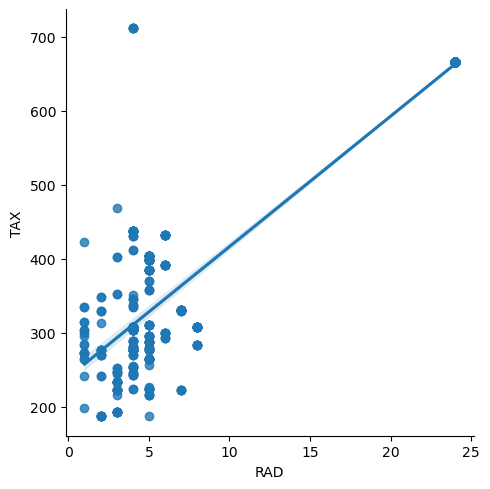

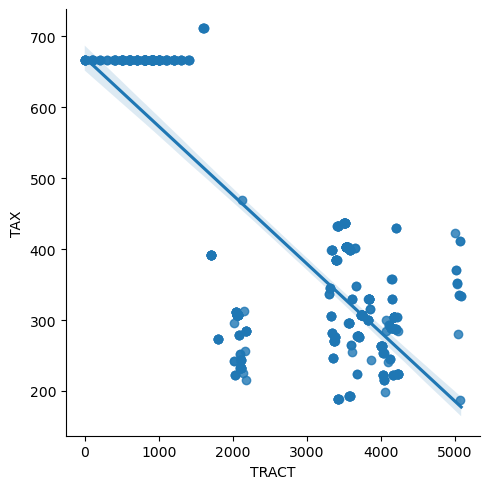

In [38]:
sns.lmplot(x='RAD', y='TAX', data=data1_clean, ci=95)
sns.lmplot(x='TRACT', y='TAX', data=data1_clean, ci=95)

eval_env: 1
eval_env: 1


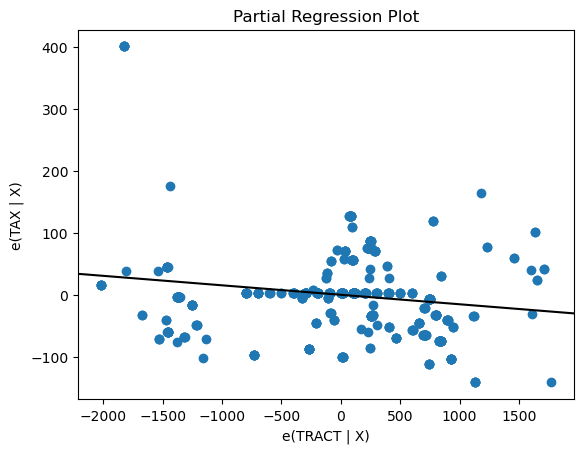

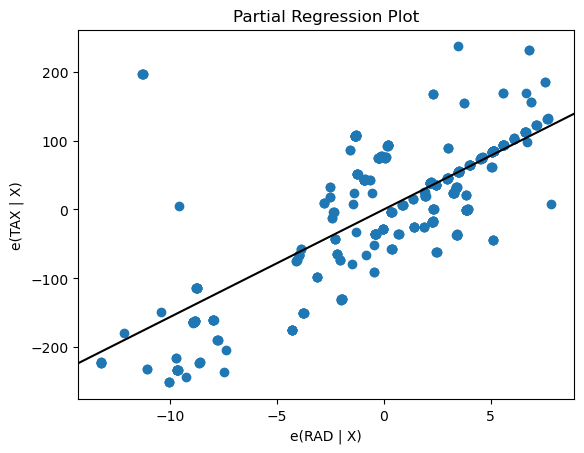

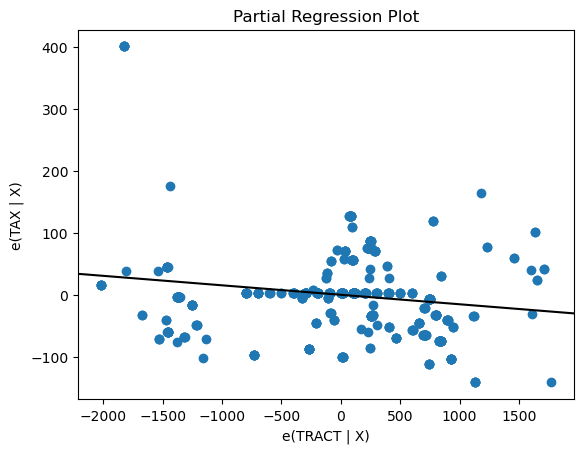

In [44]:
sm.graphics.plot_partregress('TAX', 'RAD', ['TRACT'], data=data1_clean, obs_labels=False)
sm.graphics.plot_partregress('TAX', 'TRACT', ['RAD'], data=data1_clean, obs_labels=False)